<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌بینی دست دوم</font>
</h1>




<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مجموعه‌داده</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مجموعه داده که در اختیار شما قرار گرفته حاوی اطلاعاتی درباره خودروهای دست دوم موجود برای فروش است.

</font>
</p>



In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('used_cars_train_data.csv')
test = pd.read_csv('used_cars_test_data.csv')

In [5]:
print(train.shape)
print(test.shape)

(4514, 12)
(1505, 11)


In [6]:
train.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
test.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0
1,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,Pune,2009,118000,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,8.0
2,Maruti Eeco 7 Seater Standard,Chennai,2016,55000,Petrol,Manual,First,15.1 kmpl,1196 CC,73 bhp,7.0
3,Audi A4 New 2.0 TDI Multitronic,Delhi,2012,60000,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0
4,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,Chennai,2007,145000,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,8.0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">EDA</font>
</h2>


In [8]:
train.nunique()

Name                 1645
Location               11
Year                   22
Kilometers_Driven    2407
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               422
Engine                136
Power                 347
Seats                   9
Price                1171
dtype: int64

In [9]:
train.describe()

,Year,Kilometers_Driven,Seats,Price
count,4514.000000,4.514000e+03,4481.000000,4514.000000
mean,2013.365086,5.910450e+04,5.282749,9.453618
std,3.225629,1.035393e+05,0.811023,11.121233
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.600000
75%,2016.000000,7.300000e+04,5.000000,9.942500
max,2019.000000,6.500000e+06,10.000000,160.000000


In [10]:
train.sort_values(by='Kilometers_Driven', ascending=False)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.0,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1161,Tata Tigor 1.2 Revotron XTA,Ahmedabad,2018,1000,Petrol,Automatic,First,20.3 kmpl,1199 CC,84 bhp,5.0,6.85
1242,Jaguar XE 2.0L Diesel Prestige,Delhi,2018,1000,Diesel,Automatic,First,13.6 kmpl,1999 CC,177 bhp,5.0,40.00
2054,Maruti Ignis 1.2 Alpha,Mumbai,2017,1000,Petrol,Manual,First,20.89 kmpl,1197 CC,81.80 bhp,5.0,6.36
2646,Ford Figo 2015-2019 1.2P Sports Edition MT,Mumbai,2019,1000,Petrol,Manual,First,18.12 kmpl,1196 CC,86.8 bhp,5.0,6.80


In [11]:
# data 2328 ba 6.5e6 Kilometers_Driven outlier hast
train.drop(2328, axis=0, inplace=True)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometers_Driven'}>],
       [<Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

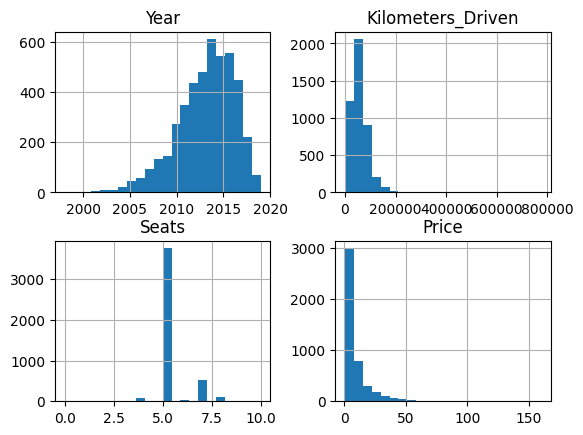

In [12]:
# To-Do (Exploratory Data Analysis)
train.hist(bins=22)

<Axes: >

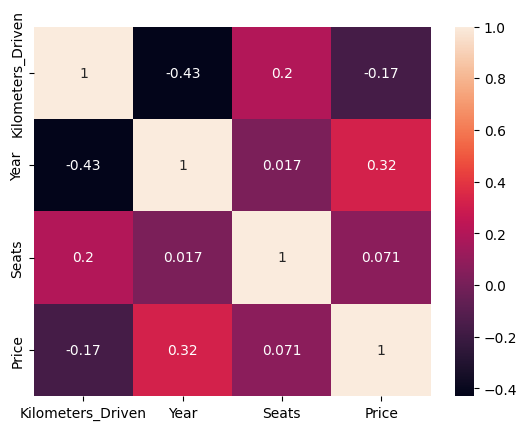

In [13]:
sns.heatmap(train[['Kilometers_Driven', 'Year', 'Seats', 'Price']].corr(), annot=True)

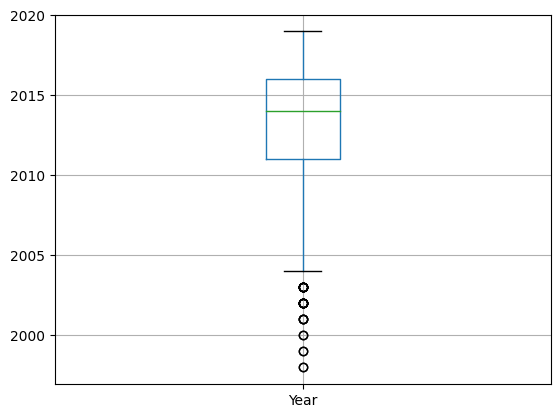

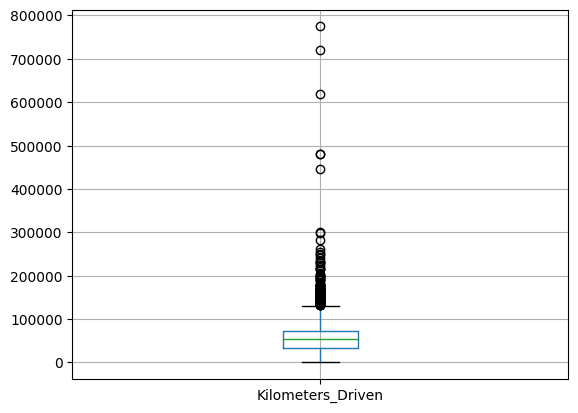

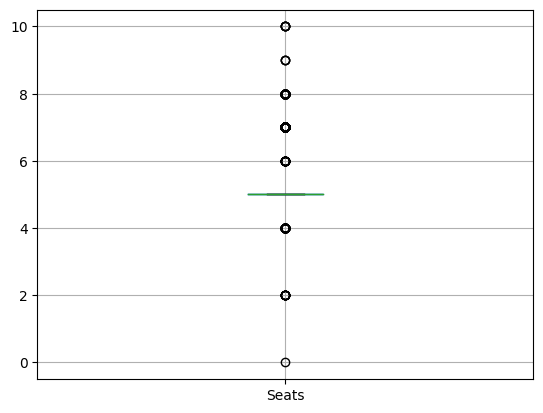

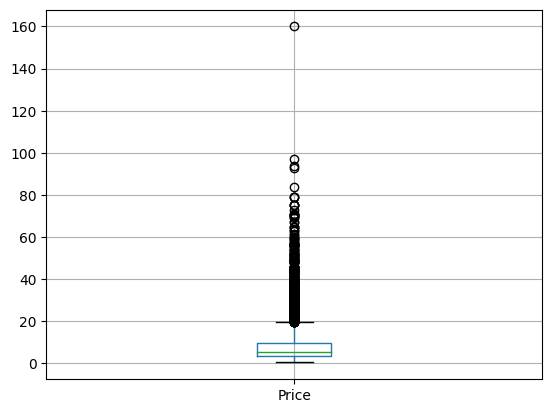

In [16]:
numeric_df = train.select_dtypes(include=['int32', 'int64', 'float64'])
for i in numeric_df.columns:
    train_encoded.boxplot(column=i)
    plt.show()

In [17]:
train.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               28
Power                28
Seats                33
Price                 0
dtype: int64

In [18]:
train.groupby('Fuel_Type').agg({'Price': 'mean'}).sort_values(by='Price')
# train.groupby('Owner_Type').agg({'Price': 'mean'}).sort_values(by='Price')
# train.groupby('Location').agg({'Price': 'median'}).sort_values(by='Price')

,Price
Fuel_Type,
LPG,2.425000
CNG,3.424545
Petrol,5.677427
Diesel,12.828023
Electric,13.000000


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مهندسی ویژگی</font>
</h2>



In [19]:
train_encoded = train.copy()

In [20]:
columns = [ 'Location', 'Name', 'Transmission']

In [21]:
train['Owner_Type'].value_counts()

Owner_Type
First             3708
Second             713
Third               84
Fourth & Above       8
Name: count, dtype: int64

In [22]:
col_order = [{'Electric': 0, 'Diesel': 1, 'Petrol': 2, 'CNG': 3, 'LPG': 4}, 
             {'First': 0, 'Second': 1, 'Third': 2, 'Fourth & Above': 3}]


In [23]:
# To-Do (Feature Engineering)
le = LabelEncoder()
for i in columns:
    train_encoded[i] = le.fit_transform(train_encoded[i])



In [24]:
train_encoded['Fuel_Type'] = train_encoded['Fuel_Type'].map(col_order[0])
train_encoded['Owner_Type'] = train_encoded['Owner_Type'].map(col_order[1])

array([[<Axes: title={'center': 'Name'}>,
        <Axes: title={'center': 'Location'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Fuel_Type'}>,
        <Axes: title={'center': 'Transmission'}>],
       [<Axes: title={'center': 'Owner_Type'}>,
        <Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

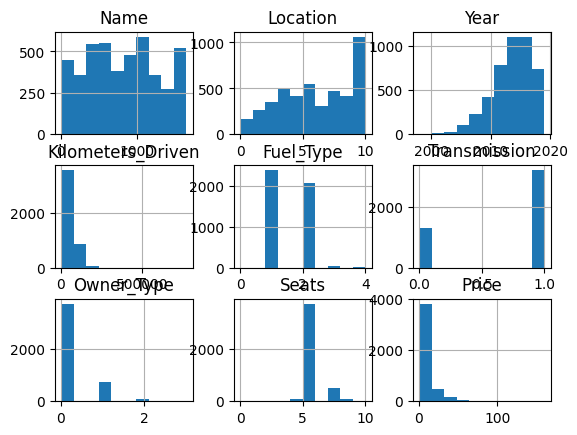

In [25]:
train_encoded.hist()

In [26]:
train_encoded.dropna(inplace=True)

<Axes: >

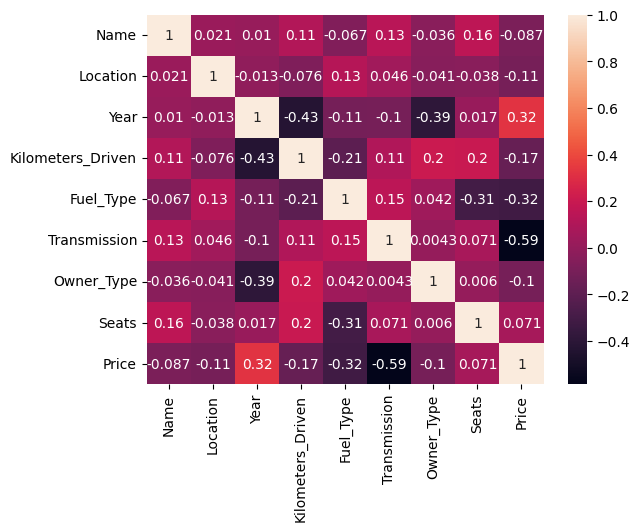

In [27]:
numeric_df = train_encoded.select_dtypes(include=['int32', 'int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True)

In [28]:
def count_outliers_iqr(data):
    data_sorted = np.sort(data)
    n = len(data_sorted)
    Q1_index = n // 4
    Q3_index = (n * 3) // 4
    
    Q1 = data_sorted[Q1_index]
    Q3 = data_sorted[Q3_index]

    IQR = Q3 - Q1
    
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
   
    outliers = data_sorted[(data_sorted < lower_bound) | (data_sorted > upper_bound)]
    
    return len(outliers)

In [29]:
def outliers_iqr(data, col_name = ''):
    data_sorted = np.sort(data[col_name])
    n = len(data_sorted)
    Q1_index = n // 4
    Q3_index = (n * 3) // 4
    
    Q1 = data_sorted[Q1_index]
    Q3 = data_sorted[Q3_index]

    IQR = Q3 - Q1
    
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
   
    filtered_df  = data[(data_sorted >= lower_bound) & (data_sorted <= upper_bound)]
    
    return filtered_df

In [30]:
train_encoded_iqr_used  = outliers_iqr(train_encoded, 'Kilometers_Driven')

In [31]:
train_encoded_iqr_used['Power'] = train_encoded_iqr_used['Power'].str.replace('bhp', '')

In [32]:
index_drop_power_nan = train_encoded_iqr_used['Power'].sort_values()[:4317:-1].index

In [33]:
train_encoded_iqr_used = train_encoded_iqr_used.loc[~train_encoded_iqr_used.index.isin(index_drop_power_nan)]

In [34]:
train_encoded_iqr_used['Power'] = train_encoded_iqr_used['Power'].astype('float32')

In [35]:
train_encoded_iqr_used['Engine'] = train_encoded_iqr_used['Engine'].str.replace('CC', '')

In [36]:
train_encoded_iqr_used['Engine'] = train_encoded_iqr_used['Engine'].astype('float32',)

In [37]:
train_encoded_iqr_used['Mileage'] = train_encoded_iqr_used['Mileage'].str.replace('kmpl', '')

In [38]:
# vaheh row 0 motefavete ba baghive row ha
train_encoded_iqr_used.drop(5, axis=0, inplace=True) 

In [39]:
check_value = 'km/kg'
def unit_find(series):
    check_index = series[series.str.contains(check_value, na=False)].index
    return check_index


In [40]:
index_km_kg = unit_find(train_encoded_iqr_used['Mileage'])

In [41]:
train_km_kg = train_encoded_iqr_used.loc[index_km_kg, :]


In [42]:
train_km_kg['Mileage'] = train_km_kg['Mileage'].str.replace('km/kg', '')

In [43]:
train_km_kg['Mileage'] = train_km_kg['Mileage'].astype('float32')

In [44]:
def convert_kg_pl(row):
    if row['Fuel_Type'] == 3:
        return row['Mileage'] / 0.54
    return row['Mileage'] / 0.75

In [45]:
train_km_kg['Mileage'] = train_km_kg.apply(lambda row: convert_kg_pl(row), axis=1)

In [46]:
index_convert = train_km_kg.index

In [47]:
train_encoded_iqr_used.loc[index_convert] = train_km_kg

In [48]:
train_encoded_iqr_used

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1063,9,2010,72000,3,1,0,49.25926,998.0,58.160000,5.0,1.75
1,455,10,2015,41000,1,1,0,19.67,1582.0,126.199997,5.0,12.50
2,432,2,2011,46000,2,1,0,18.2,1199.0,88.699997,5.0,4.50
3,938,2,2012,87000,1,1,0,20.77,1248.0,88.760002,7.0,6.00
4,18,3,2013,40670,1,0,1,15.2,1968.0,140.800003,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,288,3,2013,60328,2,1,0,15.6,1196.0,70.000000,5.0,4.54
4427,324,7,2015,34327,2,1,0,18.0,1198.0,86.699997,5.0,5.40
4428,1391,9,2014,75000,1,1,0,19.1,1405.0,70.000000,5.0,3.30
4429,1640,5,2012,86000,1,0,1,14.7,1985.0,163.000000,5.0,18.25


In [49]:
train_encoded_iqr_used['Mileage'] = train_encoded_iqr_used['Mileage'].astype('float32')

In [50]:
train_encoded_iqr_used.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int32
Owner_Type             int64
Mileage              float32
Engine               float32
Power                float32
Seats                float64
Price                float64
dtype: object

In [51]:
outliers_count = []
for i in numeric_df:
    outliers_count.append((count_outliers_iqr(train_encoded_iqr_used[i].sort_values(ascending=True)), i))
outliers_count

[(0, 'Name'),
 (0, 'Location'),
 (24, 'Year'),
 (87, 'Kilometers_Driven'),
 (0, 'Fuel_Type'),
 (0, 'Transmission'),
 (746, 'Owner_Type'),
 (704, 'Seats'),
 (413, 'Price')]

In [52]:
train_encoded_iqr_used.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4317 entries, 0 to 4430
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4317 non-null   int32  
 1   Location           4317 non-null   int32  
 2   Year               4317 non-null   int64  
 3   Kilometers_Driven  4317 non-null   int64  
 4   Fuel_Type          4317 non-null   int64  
 5   Transmission       4317 non-null   int32  
 6   Owner_Type         4317 non-null   int64  
 7   Mileage            4317 non-null   float32
 8   Engine             4317 non-null   float32
 9   Power              4317 non-null   float32
 10  Seats              4317 non-null   float64
 11  Price              4317 non-null   float64
dtypes: float32(3), float64(2), int32(3), int64(4)
memory usage: 466.3 KB


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مدل‌سازی</font>
</h2>



In [53]:
train_encoded_iqr_used.corr()['Price']

Name                -0.087524
Location            -0.109168
Year                 0.319069
Kilometers_Driven   -0.165612
Fuel_Type           -0.322366
Transmission        -0.585454
Owner_Type          -0.098439
Mileage             -0.300176
Engine               0.641595
Power                0.762101
Seats                0.070094
Price                1.000000
Name: Price, dtype: float64

In [54]:
X = train_encoded_iqr_used.drop(['Price', 'Name'], axis=1)
y = train_encoded_iqr_used['Price']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# test.dropna(inplace=True)

In [57]:
# To-Do (Modeling)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
eval = r2_score(y_test, y_pred)

In [58]:
eval

0.7105602878928319

In [59]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
}
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [60]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [61]:
# To-Do (Modeling)
model = LinearRegression(fit_intercept=True, copy_X=True, positive=False)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
eval = r2_score(y_test, y_pred)

In [62]:
eval

0.7105602878928319

In [63]:
model = LinearRegression()
n_features_list = [5, 8, 10]
for i in n_features_list:
    rfe_f_selct = RFE(estimator=model, n_features_to_select=i) 
    rfe_f_selct = rfe_f_selct.fit(X_train, y_train)
    selected_features = rfe_f_selct.support_
    selected_feature_names = X_train.columns[selected_features]

    X_train_temp = X_train[selected_feature_names]
    X_test_temp = X_test[selected_feature_names]

    cv = cross_val_score(model, X_train_temp, y_train, cv=10, scoring='r2')
    mean_cv_score = np.mean(cv)
    
    print(mean_cv_score)

0.45474919643884026
0.6750136042499978
0.6792901404549869


In [64]:
model = LinearRegression()
ssc = StandardScaler()
n_features_list = [5, 8, 10, 11, 12]
for i in n_features_list:
    rfe_f_selct = RFE(estimator=model, n_features_to_select=i) 
    rfe_f_selct = rfe_f_selct.fit(X_train, y_train)
    selected_features = rfe_f_selct.support_
    selected_feature_names = X_train.columns[selected_features]

    X_train_temp = X[selected_feature_names]
    X_train_scaled = ssc.fit_transform(X_train_temp)

    cv = cross_val_score(model, X_train_scaled, y, cv=5, scoring='r2')
    mean_cv_score = np.mean(cv)
    print(selected_feature_names)
    print(mean_cv_score)

Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Seats'], dtype='object')
0.45676408317543815
Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Power', 'Seats'],
      dtype='object')
0.6774417875438422
Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')
0.6820272351129951
Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')
0.6820272351129951
Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')
0.6820272351129951


In [65]:
# To-Do (Evaluation)
model = LinearRegression()
rfe_f_selct = RFE(estimator=model, n_features_to_select=11) 
rfe_f_selct = rfe_f_selct.fit(X_train, y_train)
selected_features = rfe_f_selct.support_
selected_feature_names = X_train.columns[selected_features]
X_train_temp = X_train[selected_feature_names]
model.fit(X_train_temp, y_train)
y_pred_val = model.predict(X_test)
print(r2_score(y_test, y_pred_val))

0.7105602878928319


In [66]:
selected_feature_names

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [67]:
y_pred_val = pd.DataFrame(y_pred_val)

array([[<Axes: title={'center': '0'}>]], dtype=object)

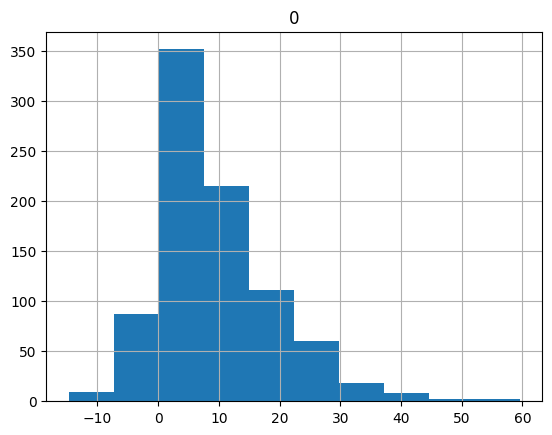

In [68]:
y_pred_val.hist()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">پیش‌بینی برای مجموعه‌ی آزمون</font>
</h2>



In [169]:
test_temp = test.copy()

In [70]:
test_temp

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0
1,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,Pune,2009,118000,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,8.0
2,Maruti Eeco 7 Seater Standard,Chennai,2016,55000,Petrol,Manual,First,15.1 kmpl,1196 CC,73 bhp,7.0
3,Audi A4 New 2.0 TDI Multitronic,Delhi,2012,60000,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0
4,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,Chennai,2007,145000,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,8.0
...,...,...,...,...,...,...,...,...,...,...,...
1500,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0
1501,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0
1502,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0
1503,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0


In [125]:
index_convert

Index([89, 255, 406, 490, 664, 992, 1141, 1196, 1233, 1362, 1367, 1388, 1421,
       1483],
      dtype='int64')

In [170]:
test_temp[test_temp.isna().any(axis=1)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
63,BMW 5 Series 520d Sedan,Delhi,2012,72000,Diesel,Automatic,Third,18.48 kmpl,NaN,NaN,NaN
90,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.7 kmpl,NaN,NaN,NaN
183,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.7 kmpl,NaN,NaN,NaN
198,Hyundai Santro Xing XG,Pune,2003,80000,Petrol,Manual,Second,17.0 kmpl,NaN,NaN,NaN
390,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0
438,Fiat Punto 1.4 Emotion,Kolkata,2010,47000,Petrol,Manual,First,14.6 kmpl,NaN,NaN,NaN
501,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
671,Maruti Swift 1.3 LXI,Delhi,2012,52000,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
756,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN
1379,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN


In [171]:
z = test_temp[test_temp['Power'] == 'null'].index

In [172]:
test_temp[test_temp['Power'] == 'null']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats


In [173]:
columns = [ 'Location', 'Transmission']

In [174]:
col_order = [{'Electric': 0, 'Diesel': 1, 'Petrol': 2, 'CNG': 3, 'LPG': 4}, 
             {'First': 0, 'Second': 1, 'Third': 2, 'Fourth & Above': 3}]


In [175]:
# To-Do (Feature Engineering)
le = LabelEncoder()
for i in columns:
    le.fit(train[i])
    test_temp[i] = le.fit_transform(test_temp[i])





In [176]:
test_temp['Fuel_Type'] = test_temp['Fuel_Type'].map(col_order[0])
test_temp['Owner_Type'] = test_temp['Owner_Type'].map(col_order[1])

In [177]:
power_index = test_temp[test_temp['Power'].isna()].index

In [178]:
power_index

Index([63, 90, 183, 198, 438, 501, 671, 756], dtype='int64')

In [179]:
test_temp.dtypes

Name                  object
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int32
Owner_Type             int64
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object

In [180]:
median_power, median_engine, median_seats,  median_mileage = train_encoded_iqr_used.median()[['Power', 'Engine', 'Seats', 'Mileage']]

In [181]:
test_temp['Engine'] = test_temp['Engine'].str.replace('CC', '', regex=False).str.strip()

In [182]:
test_temp.loc[power_index, ['Engine']] = median_engine

In [183]:
test_temp['Engine'] = test_temp['Engine'].astype('float64')

In [184]:
test_temp.loc[power_index, ['Seats']] = median_seats

In [185]:
test_temp['Power'] = test_temp['Power'].str.replace('bhp', '').str.strip()

In [186]:
test_temp.loc[power_index, ['Power']] = median_power

In [187]:
test_temp.loc[390, 'Mileage'] = median_mileage
test_temp.loc[1379, 'Seats'] = median_seats

In [188]:
test_temp['Power'].replace('null', median_power, inplace=True)

In [189]:
test_temp['Power'] = test_temp['Power'].astype('float32')

In [190]:
check_value = 'km/kg'
def unit_find(series):
    check_index = series[series.str.contains(check_value, na=False)].index
    return check_index


In [191]:
index_convert = unit_find(test_temp['Mileage'])

In [192]:
index_convert

Index([89, 255, 406, 490, 664, 992, 1141, 1196, 1233, 1362, 1367, 1388, 1421,
       1483],
      dtype='int64')

In [193]:
index_test_km_kg = index_convert
test_km_kg = test_temp.loc[index_test_km_kg, ['Mileage', 'Fuel_Type']]

In [194]:
test_km_kg

,Mileage,Fuel_Type
89,15.1 km/kg,3
255,33.44 km/kg,3
406,26.6 km/kg,3
490,15.1 km/kg,3
664,31.79 km/kg,3
992,26.2 km/kg,4
1141,26.6 km/kg,3
1196,30.46 km/kg,3
1233,26.6 km/kg,3
1362,17.5 km/kg,3


In [195]:
test_km_kg['Mileage'] = test_km_kg['Mileage'].str.replace('km/kg', '')

In [196]:
test_km_kg['Mileage'] = test_km_kg['Mileage'].astype('float32')

In [197]:
def convert_kg_pl(row):
    if row['Fuel_Type'] == 'CNG':
        return row['Mileage'] / 0.54
    return row['Mileage'] / 0.75

In [198]:
test_km_kg = test_km_kg.apply(lambda row: convert_kg_pl(row), axis=1)

In [199]:
index_convert = test_km_kg.index
test_temp.loc[index_convert, 'Mileage'] = test_km_kg

In [200]:
test_temp['Mileage'] = test_temp['Mileage'].str.replace('kmpl', '')

In [201]:
test_temp['Mileage'] = test_temp['Mileage'].astype('float32')

In [202]:
test_temp.dtypes

Name                  object
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int32
Owner_Type             int64
Mileage              float32
Engine               float64
Power                float32
Seats                float64
dtype: object

In [206]:
test_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1505 non-null   object 
 1   Location           1505 non-null   int32  
 2   Year               1505 non-null   int64  
 3   Kilometers_Driven  1505 non-null   int64  
 4   Fuel_Type          1505 non-null   int64  
 5   Transmission       1505 non-null   int32  
 6   Owner_Type         1505 non-null   int64  
 7   Mileage            1504 non-null   float64
 8   Engine             1505 non-null   float64
 9   Power              1505 non-null   float32
 10  Seats              1505 non-null   float64
dtypes: float32(1), float64(3), int32(2), int64(4), object(1)
memory usage: 111.8+ KB


In [210]:
test_temp.loc[test_temp['Mileage'].isna(), 'Mileage'] = X['Mileage'].median()

In [205]:
index_convert = test_km_kg.index
test_temp.loc[index_convert, 'Mileage'] = test_km_kg

In [211]:
test_temp.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [212]:
submission = None # TO-DO (Predictions)
model = LinearRegression()
rfe_f_selct = RFE(estimator=model, n_features_to_select=10) 
rfe_f_selct = rfe_f_selct.fit(X, y)
selected_features = rfe_f_selct.support_
selected_feature_names = X.columns[selected_features]
X_temp = X[selected_feature_names]
model.fit(X_temp, y)
y_pred = model.predict(test_temp)
# print(r2_score(y_test, y_pred))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Name


In [ ]:
submission = pd.DataFrame(y_pred, columns=['Price'])

In [ ]:
submission.hist()